In [2]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, logistic

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
lcs_count = 600
len_simulations = 50

skews = []
simuls_lcs = []

for j in range(len_simulations):
    p_total = 0
    mean = 0
    std_dev = 0.5
    lower_bound = -1
    upper_bound = 1
    x = np.linspace(lower_bound, upper_bound, 100)
    pdf = truncnorm.pdf(x, (lower_bound - mean) / std_dev, (upper_bound - mean) / std_dev, loc=mean, scale=std_dev)
    pdf = pdf / np.sum(pdf)
    skewness = np.random.choice(x, p = pdf)
    
    for i in range(lcs_count):
        p_curr = 0
        Lk_max = random.randint(20, 50)

        mean = Lk_max / 2
        std_dev = mean / 3 

        x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
        skewed_x = (x - mean) * np.exp(-skewness * ((x - mean) / std_dev))
        y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((skewed_x) / std_dev)**2)

        prob = y / np.sum(y)
        sample = np.random.choice(x, p = prob)

        for i in range(int(sample)):
            p = np.random.choice(np.linspace(50, 250, 5))
            p_curr += p
            
        p_total += p_curr
        
    print("Total Points in Simulation", j, "is:", p_total, "with skewness", skewness)
    skews.append(skewness)
    simuls_lcs.append(p_total)

Total Points in Simulation 0 is: 2102750.0 with skewness 0.5353535353535355
Total Points in Simulation 1 is: 1021550.0 with skewness -0.41414141414141414
Total Points in Simulation 2 is: 2009900.0 with skewness 0.39393939393939403
Total Points in Simulation 3 is: 1793100.0 with skewness 0.2525252525252526
Total Points in Simulation 4 is: 1026950.0 with skewness -0.4949494949494949
Total Points in Simulation 5 is: 1932600.0 with skewness 0.41414141414141437
Total Points in Simulation 6 is: 1559950.0 with skewness 0.030303030303030498
Total Points in Simulation 7 is: 2091500.0 with skewness 0.5757575757575759
Total Points in Simulation 8 is: 1853200.0 with skewness 0.2323232323232325
Total Points in Simulation 9 is: 1381950.0 with skewness -0.11111111111111105
Total Points in Simulation 10 is: 963450.0 with skewness -0.6767676767676767
Total Points in Simulation 11 is: 1468100.0 with skewness -0.050505050505050386
Total Points in Simulation 12 is: 2164050.0 with skewness 0.65656565656565

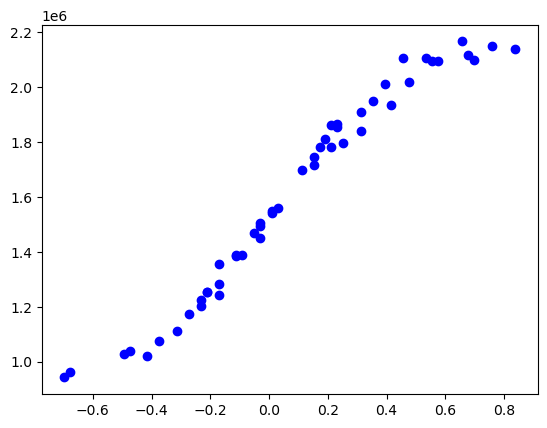

In [4]:
plt.scatter(skews, simuls_lcs, marker='o', color='blue', label='Data Points')

Referal Points

In [5]:
probs = np.exp(- 0.5 * np.linspace(1, 5, 5))
probs = probs / np.sum(probs)
print(probs)

[0.42865553 0.25999272 0.15769356 0.09564598 0.05801222]


In [6]:
day_count = 200
len_simulations = 50
probs = np.exp(- 0.5 * np.linspace(1, 5, 5))
probs = probs / np.sum(probs)

means = []
simuls_ref = []

for j in range(len_simulations):
    p_total = 0
    mean = np.random.choice(np.linspace(1, 5, 5), p=probs)
    std_dev = mean / 2
    lower_bound = 0
    upper_bound = mean + 3 * std_dev
    x = np.linspace(lower_bound, upper_bound, 100)
    pdf = truncnorm.pdf(x, (lower_bound - mean) / std_dev, (upper_bound - mean) / std_dev, loc=mean, scale=std_dev)
    pdf = pdf / np.sum(pdf)
    
    for i in range(day_count):
        p_day = 0
        ref_day = int(np.random.choice(x, p = pdf))
        for k in range(ref_day):
            points = np.random.choice(np.linspace(1000, 5000, 5))
            p_day += points
        p_total += p_day
        
    print("Total Points in Simulation", j, "is:", p_total, "with mean", mean)
    means.append(mean)
    simuls_ref.append(p_total)

Total Points in Simulation 0 is: 1581000.0 with mean 3.0
Total Points in Simulation 1 is: 320000.0 with mean 1.0
Total Points in Simulation 2 is: 2204000.0 with mean 4.0
Total Points in Simulation 3 is: 283000.0 with mean 1.0
Total Points in Simulation 4 is: 1555000.0 with mean 3.0
Total Points in Simulation 5 is: 885000.0 with mean 2.0
Total Points in Simulation 6 is: 348000.0 with mean 1.0
Total Points in Simulation 7 is: 294000.0 with mean 1.0
Total Points in Simulation 8 is: 865000.0 with mean 2.0
Total Points in Simulation 9 is: 325000.0 with mean 1.0
Total Points in Simulation 10 is: 936000.0 with mean 2.0
Total Points in Simulation 11 is: 1523000.0 with mean 3.0
Total Points in Simulation 12 is: 341000.0 with mean 1.0
Total Points in Simulation 13 is: 1522000.0 with mean 3.0
Total Points in Simulation 14 is: 1641000.0 with mean 3.0
Total Points in Simulation 15 is: 312000.0 with mean 1.0
Total Points in Simulation 16 is: 2692000.0 with mean 5.0
Total Points in Simulation 17 is: 

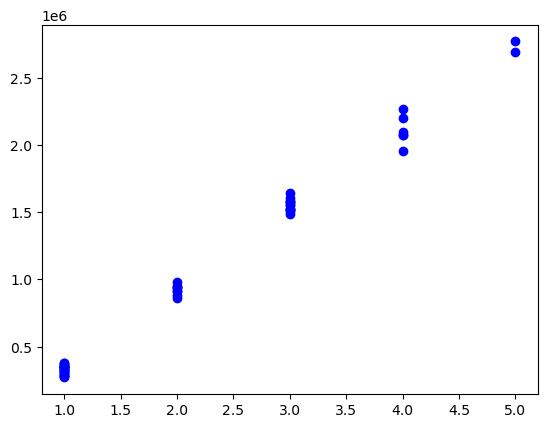

In [7]:
plt.scatter(means, simuls_ref, marker='o', color='blue', label='Data Points')

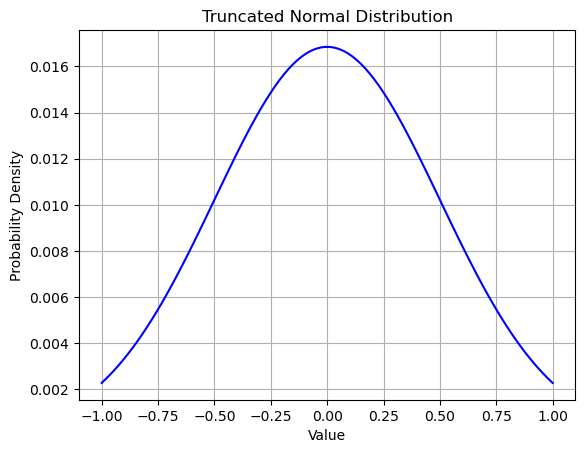

In [8]:
mean = 0
std_dev = 0.5
lower_bound = -1
upper_bound = 1
x = np.linspace(lower_bound, upper_bound, 100)
pdf = truncnorm.pdf(x, (lower_bound - mean) / std_dev, (upper_bound - mean) / std_dev, loc=mean, scale=std_dev)
pdf = pdf / np.sum(pdf)
# Plotting the truncated normal distribution curve
plt.plot(x, pdf, color='blue')
plt.title('Truncated Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

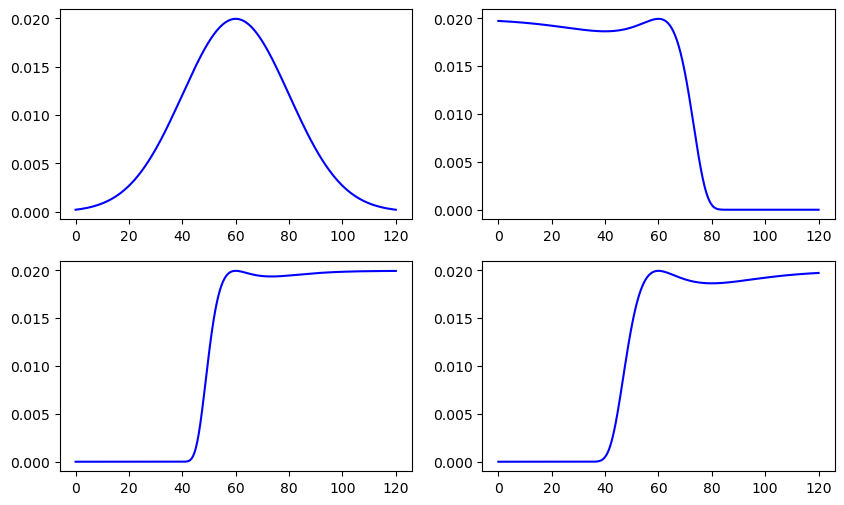

In [9]:
mean = 60
std_dev = 20
skew_list = [0, -1, 1, 1.5]
# Generate a range of x values
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)
y_list = []

for skewness in skew_list:
    skewed_x = (x - mean) * np.exp(-skewness * ((x - mean) / std_dev))
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((skewed_x) / std_dev)**2)
    y_list.append(y)

#y_list = np.array(y_list)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot the regular Gaussian distribution
axes[0, 0].plot(x, y_list[0], color='blue')
axes[0, 1].plot(x, y_list[1], color='blue')
axes[1, 1].plot(x, y_list[2], color='blue')
axes[1, 0].plot(x, y_list[3], color='blue')

plt.show()

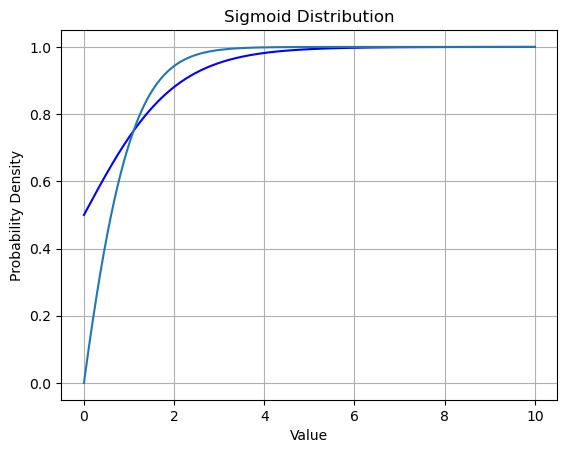

In [10]:
x_max = 10
x = np.linspace(0, x_max, 1000)

sigmoid_values = 1 / (1 + np.exp(-1 * (x)))
y = 1 - 4 * (1 - sigmoid_values) ** 2

# Plotting the sigmoid distribution
plt.plot(x, sigmoid_values, color='blue')
plt.plot(x, y)
plt.title('Sigmoid Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

In [11]:
def correction(curr_points, dif):
    y = 4000000 - curr_points
    
    if dif > 0:
        k = 100 * y / 4000000
        
    else:
        k = 30 * curr_points / 4000000
        
    sigmoid_values = 1 / (1 + np.exp(-1 * (y) / 400000))
    transformed = 1 - 4 * (1 - sigmoid_values) ** 2
    corr = (1 + k * dif) * transformed
    #print(1 + k * dif)
    return corr

print(correction(3500000, 0.1))

1.8036418335046933


In [15]:
day_count = 200
len_simulations = 1

Max_likes = 40
Min_likes = 20
Max_comms = 40
Min_comms = 20
brackets = [49999, 99999, 249999, 499999, 749999, 999999, 1499999, 1999999, 2499999, 2999999, 3499999]

skews = []
simuls_lcs = []

for j in range(len_simulations):
    points_over_time_uncorrected = []
    points_over_time_corrected = []
    last_5_likes = []
    avg_dif = []
    yes = False
    p_total_corrected = 1900000
    p_total_uncorrected = 1900000
    
    for start in range(len(brackets)):
        if brackets[start] > p_total_corrected:
            break
            
    start_corr = start
    start_uncorr = start
            
    p_ref_total = 0
    p_like_total = 0
    p_comm_total = 0
    mean_skew = 0
    std_dev_skew = 0.5
    lower_bound_skew = -1
    upper_bound_skew = 1
    x_skew = np.linspace(lower_bound_skew, upper_bound_skew, 100)
    pdf_skew = truncnorm.pdf(x_skew, (lower_bound_skew - mean_skew) / std_dev_skew, (upper_bound_skew - mean_skew) / std_dev_skew, loc=mean_skew, scale=std_dev_skew)
    pdf_skew = pdf_skew / np.sum(pdf_skew)
    skewness = np.random.choice(x_skew, p = pdf_skew)
    
    mean = np.random.choice(np.linspace(1, 5, 5), p=probs)
    std_dev = mean / 2
    lower_bound = 0
    upper_bound = mean + 3 * std_dev
    x = np.linspace(lower_bound, upper_bound, 100)
    pdf = truncnorm.pdf(x, (lower_bound - mean) / std_dev, (upper_bound - mean) / std_dev, loc=mean, scale=std_dev)
    pdf = pdf / np.sum(pdf)
    
    for day in range(1, day_count + 1):
        p_curr_likes = 0
        p_curr_comms = 0
        p_curr_ref = 0
        likes_today = random.randint(1 + int(Min_likes * day / 40), int(Max_likes * day / 30))
        comms_today = random.randint(1 + int(Min_comms * day / 40), int(Max_comms * day / 30))

        mean_likes = likes_today / 2
        mean_comms = comms_today / 2
        std_dev_likes = mean_likes / 3 + 0.001
        std_dev_comms = mean_comms / 3 + 0.001
        
        x_likes = np.linspace(mean_likes - 3 * std_dev_likes, mean_likes + 3 * std_dev_likes, 100)
        skewed_x_likes = (x_likes - mean_likes) * np.exp(-skewness * ((x_likes - mean_likes) / std_dev_likes))
        y_likes = (1 / (std_dev_likes * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((skewed_x_likes) / std_dev_likes)**2)
        
        x_comms = np.linspace(mean_comms - 3 * std_dev_comms, mean_comms + 3 * std_dev_comms, 100)
        skewed_x_comms = (x_comms - mean_comms) * np.exp(-skewness * ((x - mean_comms) / std_dev_comms))
        y_comms = (1 / (std_dev_comms * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((skewed_x_comms) / std_dev_comms)**2)

        prob_likes = y_likes / np.sum(y_likes)
        sample_likes = np.random.choice(x_likes, p = prob_likes)
        like_dedication = int(sample_likes) / likes_today
        
        prob_comms = y_comms / np.sum(y_comms)
        sample_comms = np.random.choice(x_comms, p = prob_comms)
        comm_dedication = int(sample_comms) / comms_today

        for i in range(int(sample_likes)):
            p = np.random.choice(np.linspace(50, 250, 5))
            p_curr_likes += p
        
        for i in range(int(sample_comms)):
            p = np.random.choice(np.linspace(50, 250, 5))
            p_curr_comms += p
            
        ref_day = int(np.random.choice(x, p = pdf))
        for k in range(ref_day):
            points = np.random.choice(np.linspace(1000, 5000, 5))
            p_curr_ref += points
        
        if len(last_5_likes) == 5:
            prev_avg = sum(last_5_likes) / len(last_5_likes)
            last_5_likes.pop(0)
            yes = True
            
        #print(last_5_likes)
        #print(like_dedication)
        last_5_likes.append(like_dedication) 
        curr_avg = sum(last_5_likes) / len(last_5_likes)
        
        if yes:
            dif = curr_avg - prev_avg
            #print(dif)
            avg_dif.append(dif)
            f = correction(p_total_corrected, dif)
            #print(f)
            p_total_corrected += f * (p_curr_likes + p_curr_comms + p_curr_ref)
            p_total_uncorrected += p_curr_likes + p_curr_comms + p_curr_ref
            p_ref_total += p_curr_ref
            p_like_total += p_curr_likes
            p_comm_total += p_curr_comms
            points_over_time_corrected.append(p_total_corrected)
            points_over_time_uncorrected.append(p_total_uncorrected)
            
            if start_corr < len(brackets):
                
                if start_corr == len(brackets) - 1:
                    p_total_corrected += (brackets[start_corr] - brackets[start_corr - 1]) * 0.1
                    start_corr += 1

                elif p_total_corrected > brackets[start_corr]:
                    p_total_corrected += (brackets[start_corr + 1] - brackets[start_corr]) * 0.1
                    start_corr += 1
             
            if start_uncorr < len(brackets):
                
                if start_uncorr == len(brackets) - 1:
                    p_total_uncorrected += (brackets[start_uncorr] - brackets[start_uncorr - 1]) * 0.3
                    start_uncorr += 1

                elif p_total_uncorrected > brackets[start_uncorr]:
                    p_total_uncorrected += (brackets[start_uncorr + 1] - brackets[start_uncorr]) * 0.3
                    start_uncorr += 1
                    
            #print("Corrected:", start_corr)
            #print("Uncorrected:", start_uncorr)

        #print("In day:", day, "Points in Likes:", p_curr_likes,"Points in Comms:", p_curr_comms, "Points in Refs:", p_curr_ref)
        
    print("Total Points in Simulation w/o", j, "is:", p_total_uncorrected, "with skewness", skewness)
    print("Total Points in Simulation with", j, "is:", p_total_corrected, "with skewness", skewness)
    print("Like Points:", p_like_total, "Comm Points:", p_comm_total, "Ref Points:", p_ref_total)
    skews.append(skewness)
    simuls_lcs.append(p_total)

Total Points in Simulation w/o 0 is: 6626850.0 with skewness -0.09090909090909083
Total Points in Simulation with 0 is: 3990873.859129943 with skewness -0.09090909090909083
Like Points: 1242200.0 Comm Points: 1385650.0 Ref Points: 1499000.0


[]

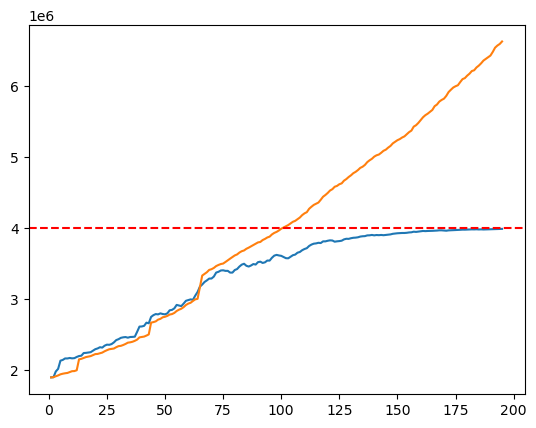

In [16]:
plt.plot(np.linspace(1, len(points_over_time_corrected), len(points_over_time_corrected)), points_over_time_corrected)
plt.plot(np.linspace(1, len(points_over_time_corrected), len(points_over_time_uncorrected)), points_over_time_uncorrected)
plt.axhline(y=4000000, color='red', linestyle='--')
plt.plot()